# Informe Tarea #

## Introducción ##

El objetivo de esta tarea es programar el código necesario para realizar experimentos de programación genetica y probar el código en ejemplos simples implementados para este propósito.

Los experimentos desarrollados para esta tarea fueron:
- Algoritmo de programación genetica para obtener el máximo entre dos ecuaciones
- Algoritmo de programación genetica que simule el programa “Des Chiffres et des Lettres”



## Experimentos ##

### Máximo entre dos ecuaciones ###

Para realizar este experimento se progamaron dos clases en el archivo abstract_tree.py, la clase Node y AbstractTree. Ambas clases se utilizaran luego como padres para implementar las clases para el segundo experimento.

Tambien se utilizó el mismo algoritmo genético implementado para la tarea 3, con algunos ajustes para que aceptara arboles en vez de vectores. Se tuvo que implementar una clase Fit para cada experimento.

#### Árboles Abstractos ####

Se adjunta una pequeña muestra de como se utilizará las clases Node y AbstractTree para crear árboles aleatorios y cruza de árboles.

In [8]:
from abstract_tree import AbstractTree
from abstract_tree import Node

# Crear dos arboles aleatorios de valores entre 0.01 y 10.0 de maximo depth 5
tree1 = AbstractTree.random_tree(0.01, 10.0, 5)
tree2 = AbstractTree.random_tree(0.01, 10.0, 5)

# Visualizamos los arboles creados 
print("----------------------")
print('tree1:')
print(tree1)
print("----------------------")
print('tree2:')
print(tree2)

# Crear un hibrido de ambos árboles con nodos elegidos aleatoriamente 
hybrid = AbstractTree.cross_tree(tree1, tree2)

# Visualizar la mezcla
print("----------------------")
print('hybrid:')
print(hybrid)

# Evaluar el árbol hybrido
print("----------------------")
print('hybrid tree evaluate: ', hybrid.evaluate())

----------------------
tree1:
<built-in function max>
	-
		2.8081084911721814
		+
			4.086464599149102
			-
				2.783206247367562
				-
					8.90348397684833
					8.446225641237628
	+
		0.24943011805749044
		-
			+
				7.221623134189392
				-
					9.595029852592443
					0.919830951260719
			-
				*
					3.1196801622063837
					4.020693939792881
				-
					8.795652401052326
					9.413956474163152

----------------------
tree2:
<built-in function max>
	2.8566018139560487
	-
		+
			*
				+
					4.664609530621533
					0.9330043012582083
				*
					9.98163970881346
					3.4723321440615584
			1.6672096975088089
		2.4655638668061997

----------------------
hybrid:
<built-in function max>
	-
		2.8566018139560487
		+
			4.086464599149102
			-
				2.783206247367562
				-
					8.90348397684833
					8.446225641237628
	+
		0.24943011805749044
		-
			+
				7.221623134189392
				-
					9.595029852592443
					0.919830951260719
			-
				*
					3.1196801622063837
					4.020693939792881
				-
					8.7956

Los árboles aleatorios creados por AbstractTree tienen todos un nodo en común que tiene una funcón max, por lo que el algoritmo aleatorio intentara contruir un árbol hecho en base a mezclas de la población que maximice el resultado.

iteration:  0  max fit:  209.518170447  mean fit:  13.0498696842
iteration:  1  max fit:  214.3826497  mean fit:  29.8853308191
iteration:  2  max fit:  1744.12866483  mean fit:  115.195832222
iteration:  3  max fit:  49975.6732538  mean fit:  1312.85948607
iteration:  4  max fit:  465035.467734  mean fit:  14896.6945172
iteration:  5  max fit:  10054068.2134  mean fit:  170996.009273
iteration:  6  max fit:  9208926683.46  mean fit:  117313819.837
iteration:  7  max fit:  9.96752574882e+15  mean fit:  9.96757637089e+13
iteration:  8  max fit:  9.96752574882e+15  mean fit:  74043892239.8
iteration:  9  max fit:  2.39062416028e+18  mean fit:  2.66180368372e+16
iteration:  10  max fit:  3.13093264605e+28  mean fit:  3.13093268865e+26
iteration:  11  max fit:  5.96785245234e+36  mean fit:  5.96888993443e+34
iteration:  12  max fit:  9.86339855867e+45  mean fit:  9.86942881405e+43
iteration:  13  max fit:  5.04160367311e+48  mean fit:  5.13099847872e+46
iteration:  14  max fit:  8.96902712

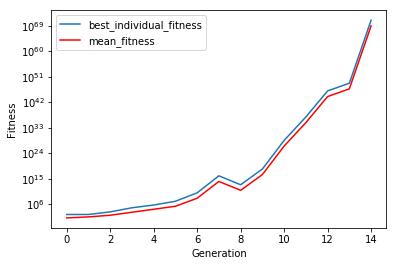

In [26]:
import numpy as np
import matplotlib.pyplot as plt
from genetic import Genetic
from genetic import FitAbstractTree

max_depth = 3
pop_size = 100
max_generation = 300

# clase de Fit especializada para el problema espcífico.
fit_class = FitAbstractTree(None)

asbtract_tree = Genetic(fitness_class=fit_class,
                        gene_size=max_depth, 
                        population_size=pop_size, 
                        mut_rate=0.01,
                        max_fitness=1E100,
                        n_pool=None)

fitest, best_vector, mean_vector = asbtract_tree.evolve(max_generation)

max_generation = best_vector.size

print('tree found at iteration', max_generation)
print(' found: ', fitest.evaluate())
line1 = plt.semilogy(np.array([i for i in range(max_generation)]), best_vector, label='best_individual_fitness')
line2 = plt.semilogy(np.array([i for i in range(max_generation)]), mean_vector, '-r', label='mean_fitness')
plt.legend(['best_individual_fitness', 'mean_fitness'])

plt.ylabel('Fitness')
plt.xlabel('Generation')


plt.show()

Se observa una curva exponencial en las funciones fitness del mejor individuo y la media de la población. En 15 generaciones se encuentra una ecuación que obtiene un resultado mayor a 1E100. Se adjunta también la clase Fit que se implemento en el archivo genetic.py.

In [27]:
# # Fit class for abstract tree
# class FitAbstractTree(Fit):
#     tree=AbstractTree
# 
#     def random_individual(self, gene_num):
#         # for abstract tree the gene number will be the maximum level available
#         return self.tree.random_tree(0.01, 10.0, gene_num)
# 
#     def evaluate(self, vec):
#         return vec.evaluate()
# 
#     def reproduce_parents(self, p1, p2):
#         return self.tree.cross_tree(p1,p2)
# 
#     def mut_func(self, individual, mut_rate):
#         # Change one gene if mutation is activated
#         if random.uniform(0, 1) <= mut_rate:
#             return self.tree.cross_tree(individual, self.tree.random_tree(0.01, 10.0, 3))
#         else:
#             return individual

### “Des Chiffres et des Lettres” ###

Para este experimento se realizó un algoritmo genético que intenta encontrar una ecuación que llegue a un target específico, utilizando solo un set de números.

Para llevar a cabo esta implementación, se desarrollo dos nuevas clases ChNode y ChTree, ambas hijos de Node y AbstractTree correpondientemente. En ChNode se guarda un set de datos que se pueden utilizar y se cambia la funcion de división por una floor_division que protege cuando se divide por cero.

A continuación se muestra un ejemplo utilizando estas clases.



In [32]:
from chiffres_tree import ChTree
from chiffres_tree import ChNode

# Creamos dos arboles aleatorios
ChNode.number_set = [10, 1, 25, 9, 3, 6]
tree1 = ChTree.random_tree(max_level=5, node_class=ChNode)
tree2 = ChTree.random_tree(max_level=5, node_class=ChNode)

# Visualizamos los arboles creados 
print("----------------------")
print('tree1:')
print(tree1)
print("----------------------")
print('tree2:')
print(tree2)

# Crear un hibrido de ambos árboles con nodos elegidos aleatoriamente 
hybrid = ChTree.cross_tree(tree1, tree2)

# Visualizar la mezcla
print("----------------------")
print('hybrid:')
print(hybrid)

# Evaluar el árbol hybrido
print("----------------------")
print('hybrid tree evaluate: ', hybrid.evaluate())

----------------------
tree1:
/
	6
	6

----------------------
tree2:
*
	-
		*
			1
			/
				3
				-
					25
					9
		10
	*
		-
			/
				1
				/
					3
					9
			1
		10

----------------------
hybrid:
/
	6
	10

----------------------
hybrid tree evaluate:  0


Finalmente con estas nuevas clases se implementa una nueva clase Fit adaptada al modelo (con una función fitness especial) y se corre el experimento.

iteration:  0  max fit:  -97  mean fit:  -3.2709999999999997e+201
iteration:  1  max fit:  -53  mean fit:  -338.15
iteration:  2  max fit:  -7  mean fit:  -554.61
iteration:  3  max fit:  -7  mean fit:  -1198.43
iteration:  4  max fit:  -7  mean fit:  -2e+198
iteration:  5  max fit:  -7  mean fit:  -1e+198
iteration:  6  max fit:  -3  mean fit:  -1159.84
iteration:  7  max fit:  -3  mean fit:  -1e+198
iteration:  8  max fit:  -3  mean fit:  -1311.75
iteration:  9  max fit:  -3  mean fit:  -2330.51
iteration:  10  max fit:  -3  mean fit:  -1e+198
iteration:  11  max fit:  -2  mean fit:  -1160.25
iteration:  12  max fit:  -1  mean fit:  -783.53
iteration:  13  max fit:  -1  mean fit:  -2067.37
iteration:  14  max fit:  -1  mean fit:  -1913.09
iteration:  15  max fit:  -1  mean fit:  -1269.39
iteration:  16  max fit:  -1  mean fit:  -1022.56
iteration:  17  max fit:  -1  mean fit:  -1.9e+199
iteration:  18  max fit:  -1  mean fit:  -1.9e+199
iteration:  19  max fit:  -1  mean fit:  -1914.

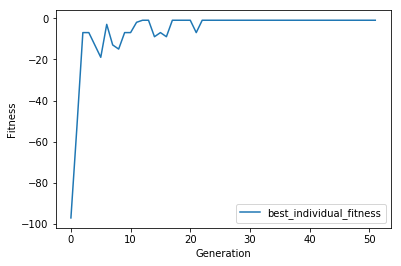

In [36]:
import numpy as np
import matplotlib.pyplot as plt
from genetic import Genetic
from genetic import FitChTree
from chiffres_tree import ChNode

gen_size = 5
pop_size = 100
max_generation = 300
# answer = np.array([random.randint(0, 1) for i in range(vec_size)])

fit_class = FitChTree(347)
ChNode.number_set = [10, 1, 25, 9, 3, 6]

asbtract_tree = Genetic(fitness_class=fit_class, gene_size=gen_size, population_size=pop_size, mut_rate=0.1,
                  max_fitness=0, n_pool=None)
fitest, best_vector, mean_vector = asbtract_tree.evolve(max_generation)
max_generation = best_vector.size

print('tree found at iteration', max_generation)
print('found evaluate: ', fitest.evaluate())
plt.plot(np.array([i for i in range(max_generation)]), best_vector)

# No graficaremos la media pk tiene valores muy grandes y entorpecen la visualización.
# plt.plot(np.array([i for i in range(max_generation)]), mean_vector, '-r')

plt.legend(['best_individual_fitness'])

plt.ylabel('Fitness')
plt.xlabel('Generation')

plt.show()

Se observa que la curva baja muy rapidamente a -1 en pocas iteraciones y que luego se demora un tiempo en encontrar la ecuación. Tambien es de notar que depende mucho de las condiciones iniciales la cantidad de iteraciones que se necesitaran para encontrar la solución.

A continuación de deja como anexo la clase Fit que se utilizó para el algoritmo.

In [ ]:
# class FitChTree(FitAbstractTree):
#     tree=ChTree
# 
#     def evaluate(self, vec):
#         return -abs( vec.evaluate() - self.ref)
